In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import keras
from keras.layers import Input,Dense,Flatten,MaxPool1D,Activation,LeakyReLU,LSTM,BatchNormalization,Dropout, Conv1D,Lambda
from keras.models import Model,load_model
import pandas as pd
import keras.backend as K
import h5py

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
feat_file='/content/gdrive/My Drive/EE5611_project_features/base_scrnn_features.h5'
model_dir = '/content/gdrive/My Drive/EE5611_project_features/SCRNN_models/Baseline_SCRNN_models/'
fid=h5py.File(feat_file,'r');
x_ts=fid['x_ts']
y_ts=fid['y_ts']
snr_ts = np.array(fid['snr_ts'])
labels =['BPSK','QPSK','PAM4','AM_DSB','GFSK','QAM64','AM_SSB','_8PSK','QAM16','WBFM','CPFSK']
print(labels)
modelfile = 'model_epoch-34_val_acc-0.62.h5'
model = load_model(model_dir+modelfile)
layer_name = 'conv1d_1'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)

['BPSK', 'QPSK', 'PAM4', 'AM_DSB', 'GFSK', 'QAM64', 'AM_SSB', '_8PSK', 'QAM16', 'WBFM', 'CPFSK']


In [0]:
X = np.array(x_ts)
Y = np.array(y_ts)
p = np.where(snr_ts==16)[0]
y_18db = Y[p]
x_18db = X[p] 
intermediate_output = intermediate_layer_model.predict(x_18db)

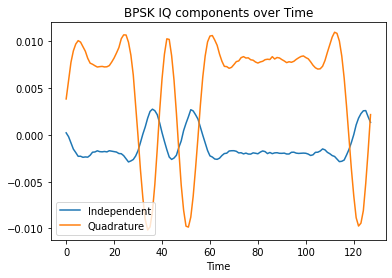

In [7]:
n = 0
plt.plot(range(0,128),x_18db[n].T[0],label='Independent')
plt.plot(range(0,128),x_18db[n].T[1],label='Quadrature')
plt.legend()
plt.title('BPSK IQ components over Time')
plt.xlabel('Time')
plt.show()

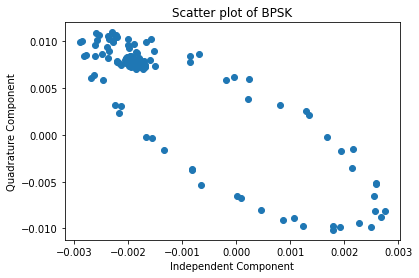

In [9]:
plt.scatter(x_18db[n].T[0],x_18db[n].T[1])
plt.title('Scatter plot of BPSK')
plt.xlabel('Independent Component')
plt.ylabel('Quadrature Component')
plt.show()

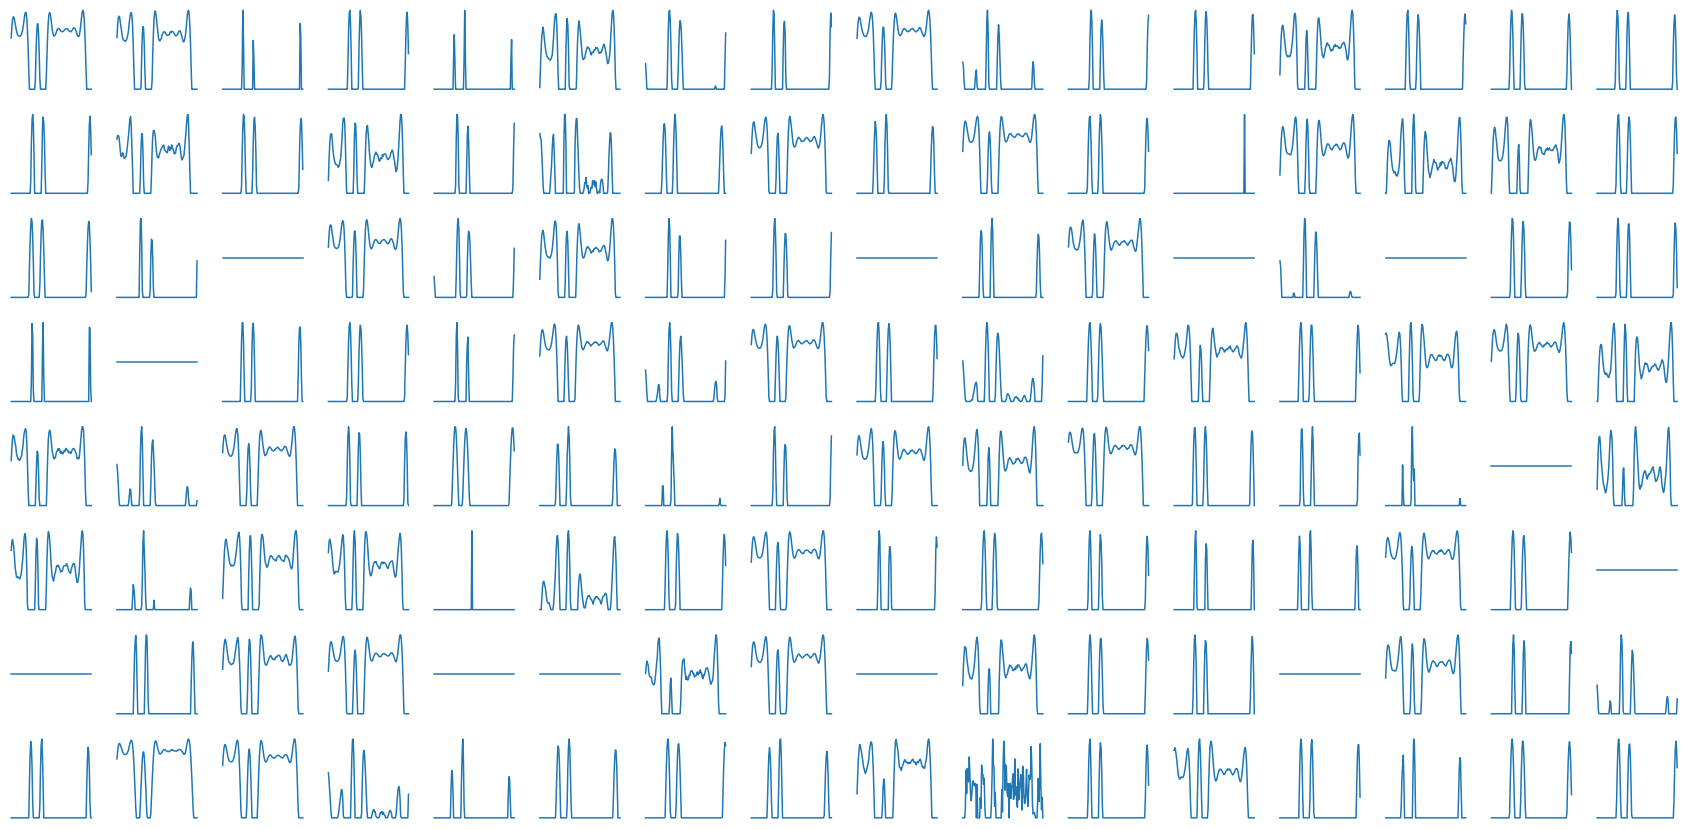

(124,)


In [13]:
out = np.transpose(intermediate_output[n])

fig,a =  plt.subplots(8,16,figsize=(30,15))
x =0
for i in range(8):
  for j in range(16):
    a[i][j].plot(out[x])
    a[i][j].axis('off')
    x += 1
plt.show()
print(out[x-1].shape)

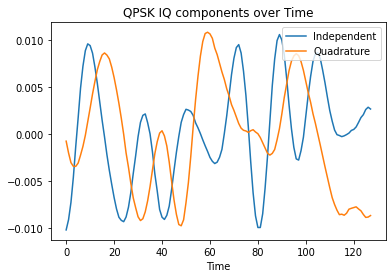

In [14]:
n = 101
plt.plot(range(0,128),x_18db[n].T[0],label='Independent')
plt.plot(range(0,128),x_18db[n].T[1],label='Quadrature')
plt.legend()
plt.title('QPSK IQ components over Time')
plt.xlabel('Time')
plt.show()

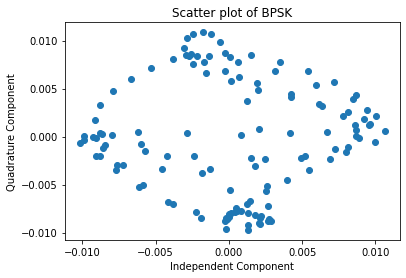

In [15]:
plt.scatter(x_18db[n].T[0],x_18db[n].T[1])
plt.title('Scatter plot of BPSK')
plt.xlabel('Independent Component')
plt.ylabel('Quadrature Component')
plt.show()

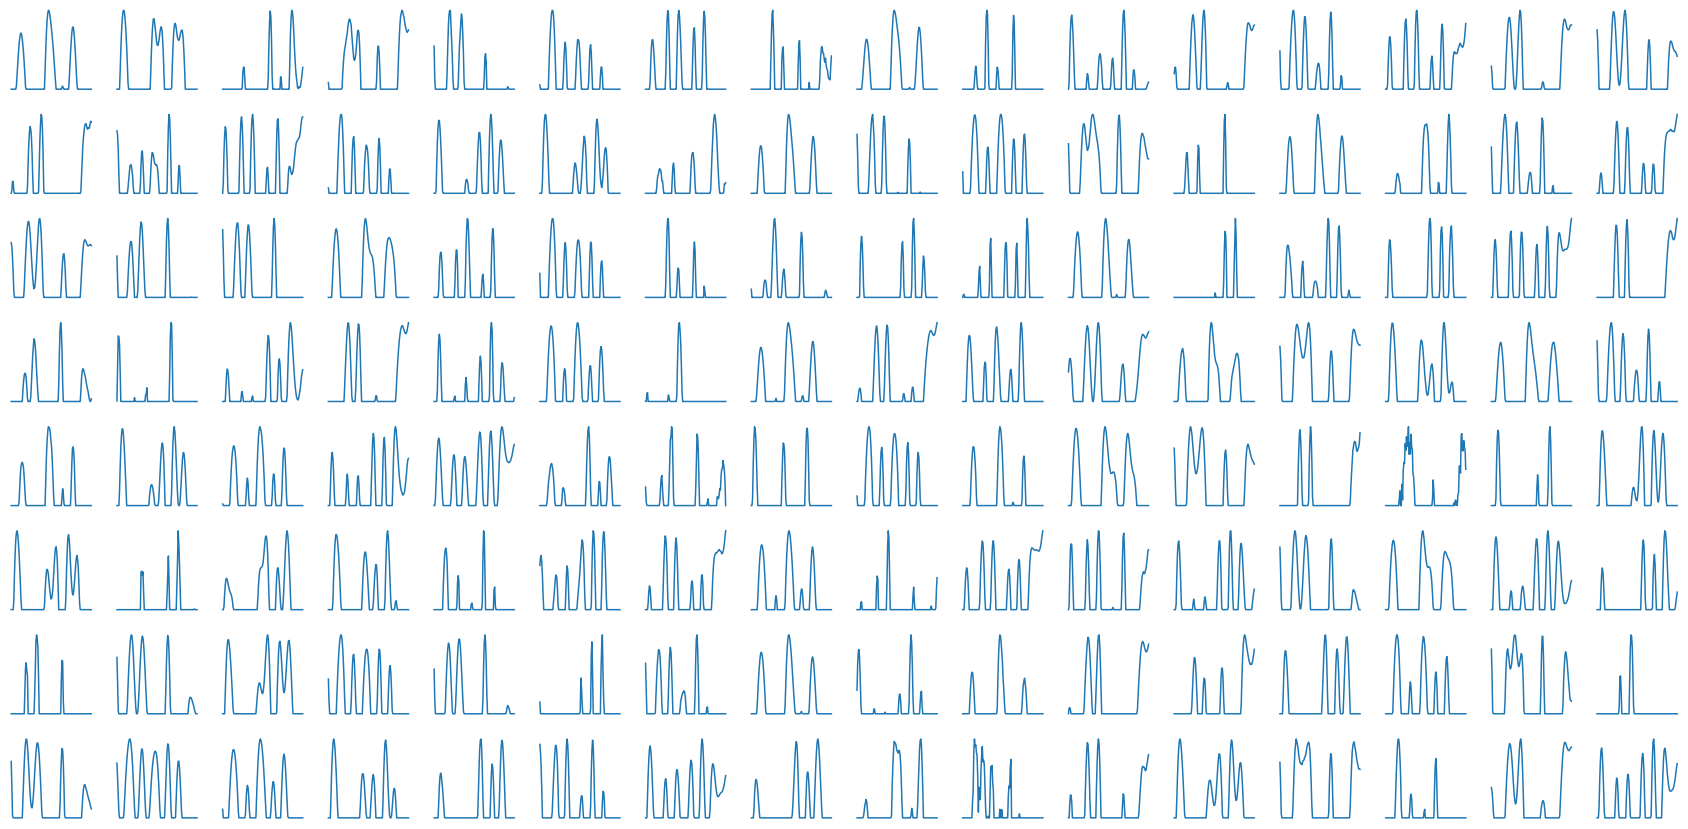

(124,)


In [16]:
out = np.transpose(intermediate_output[n])

fig,a =  plt.subplots(8,16,figsize=(30,15))
x =0
for i in range(8):
  for j in range(16):
    a[i][j].plot(out[x])
    a[i][j].axis('off')
    x += 1
plt.show()
print(out[x-1].shape)

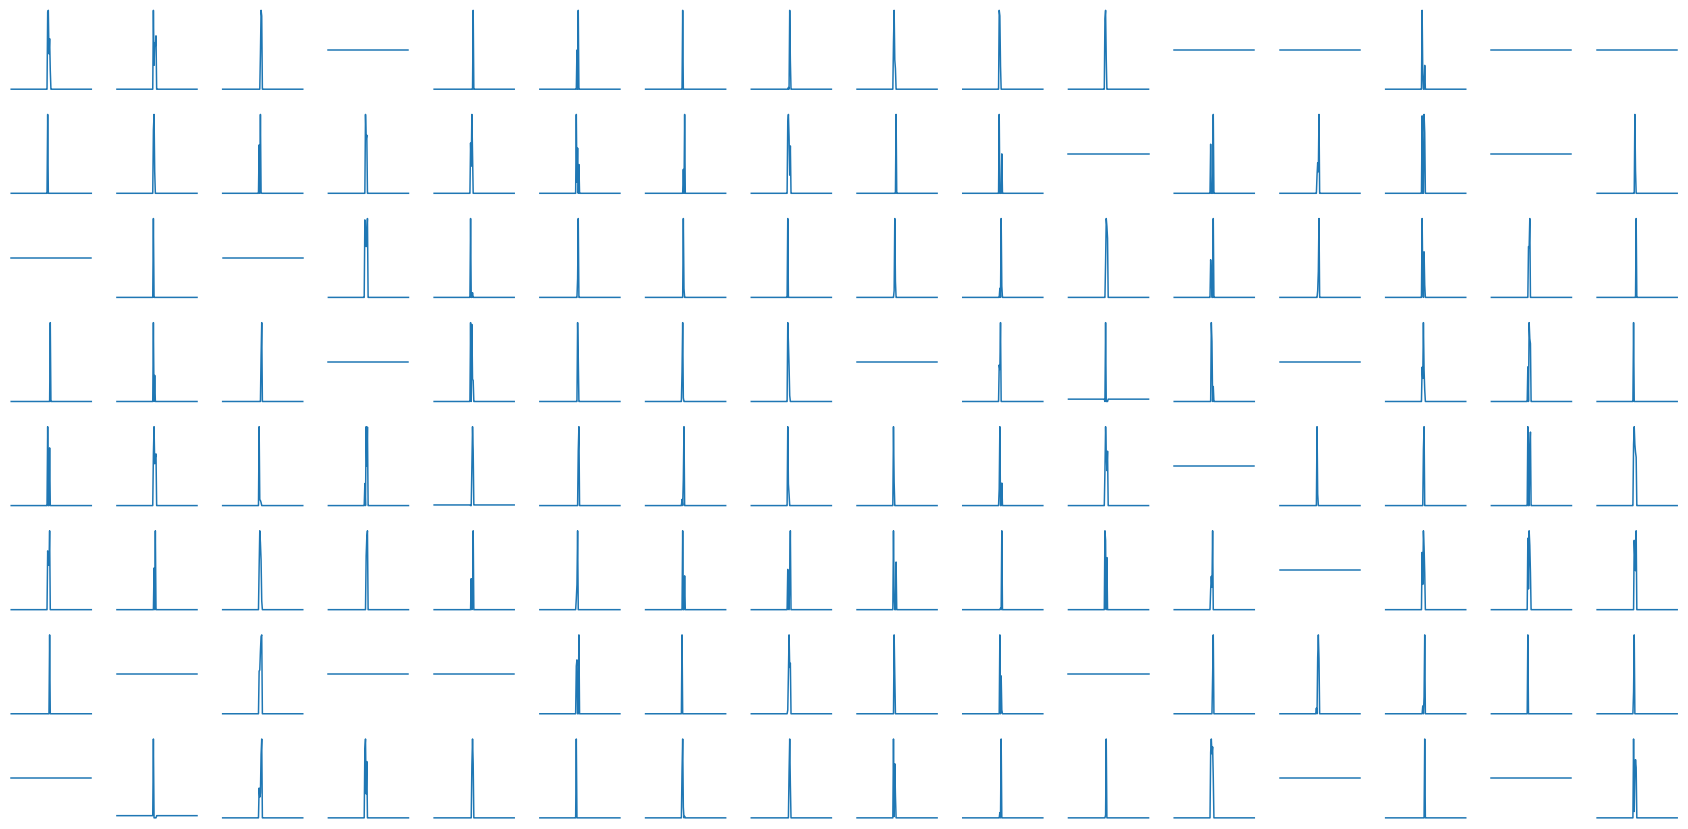

(124,)


In [22]:
xx = np.zeros((1,128,2))
xx[0,60] = 1
intermediate_impulse_output = intermediate_layer_model.predict(xx)
out = np.transpose(intermediate_impulse_output[0])

fig,a =  plt.subplots(8,16,figsize=(30,15))
x =0
for i in range(8):
  for j in range(16):
    a[i][j].plot(out[x])
    a[i][j].axis('off')
    x += 1
plt.show()
print(out[x-1].shape)